first of all we will implement using linear regression and then using ridge and lasso regression methods to clearly see the differences between linear , ridge and lasso regression


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# the load_boston dataset has been removed from the sklearn library
# so that's why we use fetach_california_housing dataset for ridge and lass regression

from sklearn.datasets import fetch_california_housing

In [3]:
df = fetch_california_housing()
df

# data show the values based on the numbers of features in array format
# target : basically the price of the house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
# converting into data frame 
dataset = pd.DataFrame(df.data)
dataset.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
# assigning the features names to columns as their names  
dataset.columns = df.feature_names
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
df.target.shape

(20640,)

In [7]:
# creating new column naming 'price' and putting target variable over there.
dataset["Price"] = df.target

In [8]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
# splitting dependent and independent features 
X = dataset.iloc[:,:-1]  # independent features
Y = dataset.iloc[:,-1]    # dependent feature


### Linear Regression

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
mean_squared_error = cross_val_score(linear_regressor, X, Y, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse = np.mean(mean_squared_error)
print(mean_mse)




-0.5582901717686564


In [13]:
linear_regressor.fit(X,Y)

LinearRegression()

### Ridge Regression

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV # gridseachve for alpha value

ridge_reg = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5,10,20,30,35,40,45,50, 55,60,65,70, 75,80,85,90,100]}
ridge_regressor = GridSearchCV(ridge_reg, parameters, scoring='neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X,Y)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
                                   80, 85, 90, 100]},
             scoring='neg_mean_squared_error')

In [15]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 70}
-0.5579296039596863


we have tested the cross validation values. by putting 10 in ridge regression instead of 5, the time to train the model increases to 1.5 seconds instead of 0.7 seconds for the value of 5.

### Lasso regression

In [16]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


lasso_reg = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5,10,20,30,35,40,45,50, 55,60,65,70, 75,80,85,90,100]}
lasso_regressor = GridSearchCV(lasso_reg, parameters, scoring='neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X,Y)

c:\Users\azhar afridi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.201e+03, tolerance: 2.228e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\azhar afridi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.818e+03, tolerance: 2.256e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\azhar afridi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
                                   80, 85, 90, 100]},
             scoring='neg_mean_squared_error')

In [17]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-0.5582759293868985


lasso regression is not good as compare to ridge in this case. it takes more time but is some how good accuracy then linear regression

In [19]:
# now showing lasso and ridge through displot to see the most generalized model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)

In [20]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)
prediction_linear = linear_regressor.predict(X_test)

C:\Users\azhar afridi\AppData\Local\Temp\ipykernel_17712\350917981.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-prediction_lasso)


<Axes: xlabel='Price', ylabel='Density'>

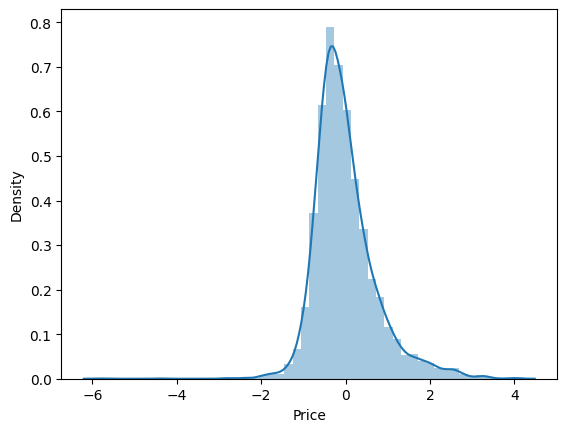

In [21]:
# showing the lasso regression graphically.
sns.distplot(Y_test-prediction_lasso)

c:\Users\azhar afridi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


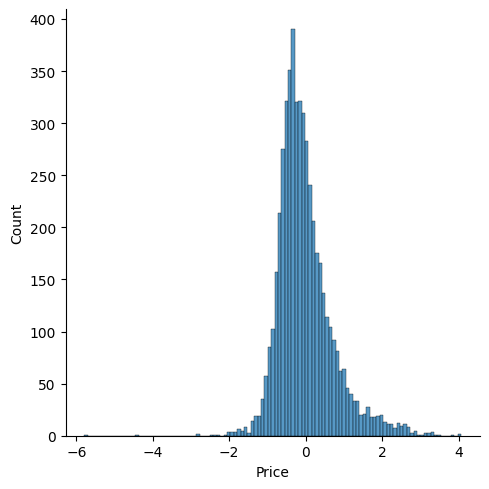

In [22]:
# showing graphically the ridge regression 
sns.displot(Y_test-prediction_ridge)

c:\Users\azhar afridi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


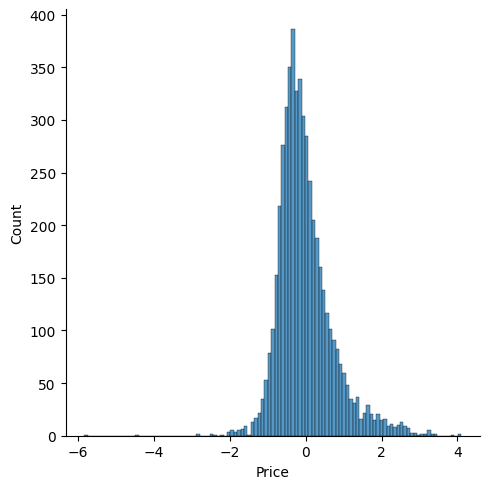

In [23]:
## now showing the linear regreassion graphincally
sns.displot(Y_test-prediction_linear)